In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
noteevents = pd.read_csv("../data/raw/NOTEEVENTS.csv.gz", compression="gzip", low_memory=False)
diagnoses_icd = pd.read_csv("../data/raw/DIAGNOSES_ICD.csv.gz", compression="gzip", low_memory=False)

In [31]:
print("### NOTEEVENTS ###\n")
print(noteevents.info(), end="\n\n")
print(noteevents.head())

### NOTEEVENTS ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083180 entries, 0 to 2083179
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ROW_ID       int64  
 1   SUBJECT_ID   int64  
 2   HADM_ID      float64
 3   CHARTDATE    object 
 4   CHARTTIME    object 
 5   STORETIME    object 
 6   CATEGORY     object 
 7   DESCRIPTION  object 
 8   CGID         float64
 9   ISERROR      float64
 10  TEXT         object 
dtypes: float64(3), int64(2), object(6)
memory usage: 174.8+ MB
None

   ROW_ID  SUBJECT_ID   HADM_ID   CHARTDATE CHARTTIME STORETIME  \
0     174       22532  167853.0  2151-08-04       NaN       NaN   
1     175       13702  107527.0  2118-06-14       NaN       NaN   
2     176       13702  167118.0  2119-05-25       NaN       NaN   
3     177       13702  196489.0  2124-08-18       NaN       NaN   
4     178       26880  135453.0  2162-03-25       NaN       NaN   

            CATEGORY DESCRIPTION  CGID  ISERROR  \
0  Di

In [32]:
print("### DIAGNOSES_ICD ###\n")
print(diagnoses_icd.info(), end="\n\n")
print(diagnoses_icd.head())

### DIAGNOSES_ICD ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651047 entries, 0 to 651046
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ROW_ID      651047 non-null  int64  
 1   SUBJECT_ID  651047 non-null  int64  
 2   HADM_ID     651047 non-null  int64  
 3   SEQ_NUM     651000 non-null  float64
 4   ICD9_CODE   651000 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 24.8+ MB
None

   ROW_ID  SUBJECT_ID  HADM_ID  SEQ_NUM ICD9_CODE
0    1297         109   172335      1.0     40301
1    1298         109   172335      2.0       486
2    1299         109   172335      3.0     58281
3    1300         109   172335      4.0      5855
4    1301         109   172335      5.0      4254


In [33]:
discharge_summaries = noteevents[noteevents["CATEGORY"] == "Discharge summary"]
print(f"Total discharge summaries: {len(discharge_summaries)}")

Total discharge summaries: 59652


In [34]:
grouped_icd = diagnoses_icd.groupby("HADM_ID")["ICD9_CODE"].apply(list).reset_index()
grouped_icd.head()

,HADM_ID,ICD9_CODE
0,100001,"[25013, 3371, 5849, 5780, V5867, 25063, 5363, ..."
1,100003,"[53100, 2851, 07054, 5715, 45621, 53789, 4019,..."
2,100006,"[49320, 51881, 486, 20300, 2761, 7850, 3090, V..."
3,100007,"[56081, 5570, 9973, 486, 4019]"
4,100009,"[41401, 99604, 4142, 25000, 27800, V8535, 4148..."


In [61]:
labled_data = discharge_summaries.merge(grouped_icd, on=["HADM_ID"], how="inner")
labled_data.to_csv("../data/processed/labled_dataset.csv", index=False)
print(f"Total records after merging: {len(labled_data)}")
labled_data.head()

Total records after merging: 59652


,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT,ICD9_CODE
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...,"[01193, 4254, 42731, 2639, 2762, 5070, 5119, 2..."
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...,"[5191, 49121, 51881, 486, 2761, 2449, 311]"
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...,"[5191, 5185, 496, 2762, 45340, 5533]"
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...,"[51884, 5849, 34830, 49121, 2760, 4160, 3594, ..."
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...,"[80506, 5070, 42823, 2930, 4538, E882, 4280, 4..."


count    59652.000000
mean      1435.262556
std        828.181290
min          9.000000
25%        868.000000
50%       1328.000000
75%       1888.000000
max       7980.000000
Name: TEXT_LENGTH, dtype: float64


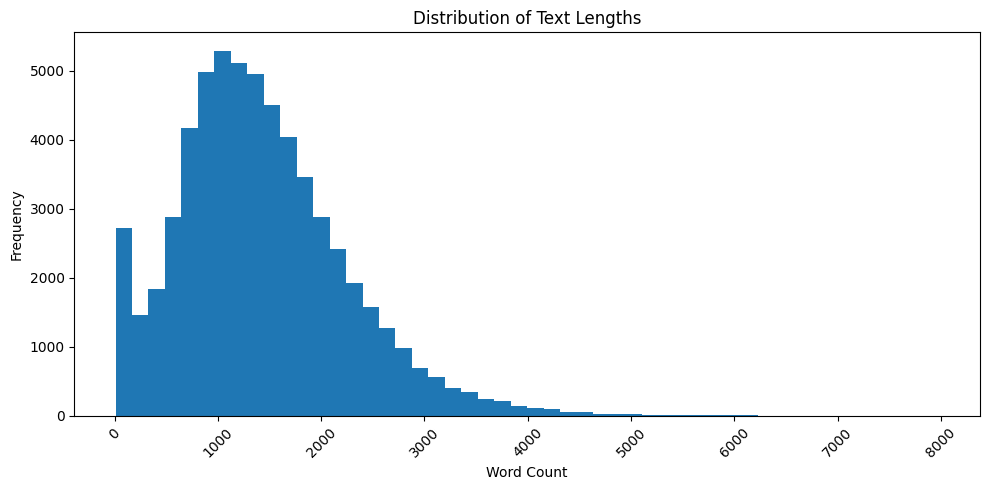

In [36]:
labled_data["TEXT_LENGTH"] = labled_data["TEXT"].str.split().apply(len)
print(labled_data["TEXT_LENGTH"].describe())

plt.figure(figsize=(10, 5))
plt.hist(labled_data["TEXT_LENGTH"], bins=50)
plt.title("Distribution of Text Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Total ICD Codes: 6918

4019     22399
4280     14931
42731    14479
41401    13801
5849      9943
25000     9831
2724      9279
51881     8271
5990      7499
53081     6738
Name: count, dtype: int64


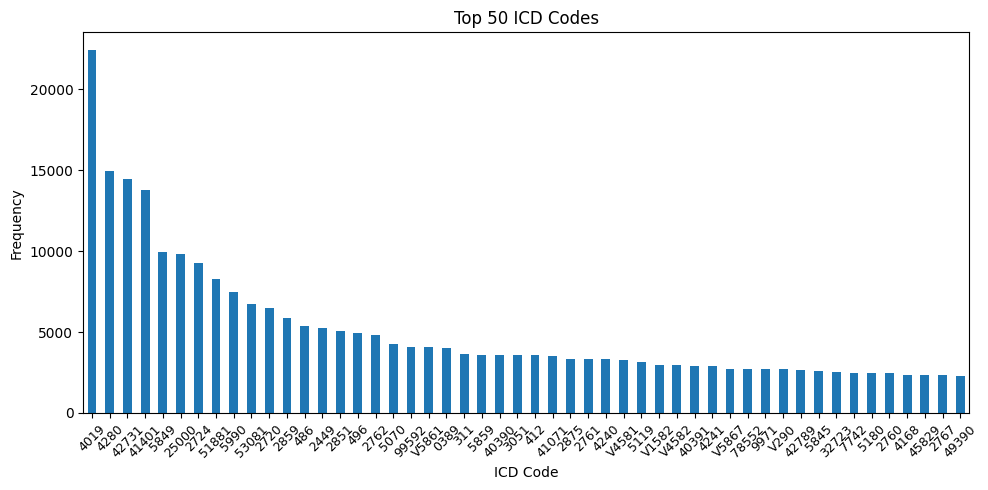

In [54]:
all_icd_codes = [code for codes in labled_data["ICD9_CODE"] for code in codes]
icd_counts = pd.Series(all_icd_codes).value_counts()
print(f"Total ICD Codes: {len(icd_counts)}", end="\n\n")
print(icd_counts.head(10))

plt.figure(figsize=(10, 5))
icd_counts.head(50).plot(kind="bar")
plt.title("Top 50 ICD Codes")
plt.xlabel("ICD Code")
plt.ylabel("Frequency")
plt.xticks(rotation=45, size=9)
plt.tight_layout()
plt.show()

In [70]:
rare_threshold = 10
rare_codes = icd_counts[icd_counts < rare_threshold]
print(f"Total rare codes: {len(rare_codes)} (~{round((len(rare_codes) / len(icd_counts)*100))}%)")

Total rare codes: 3941 (~57%)
